In [21]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import random
import seaborn as sns
import handcalcs.render
from IPython import display 

#### Random Forest Algorithum

> Boostrap the data to generate a data to fit a decision tree

> Before making a decision tree, the algorithum will shuffle and randomly select the subset the variables

> Then, the algorithum will select the best variables based on gini index or node impurity

> Once algorithum builds enough trees, the prediction is separately by regression and classification

> Average of all trees is regression

> Majority of all trees is the prediction

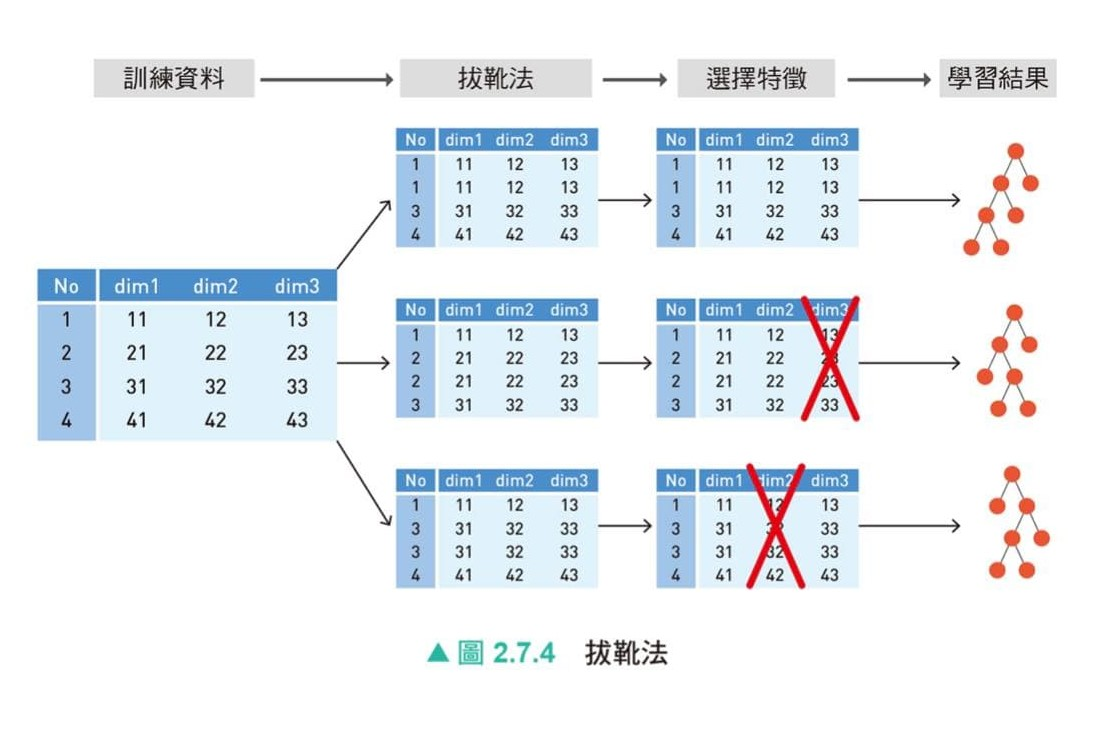

In [24]:
display.Image("photo_2021-01-03_10-56-32.jpg")

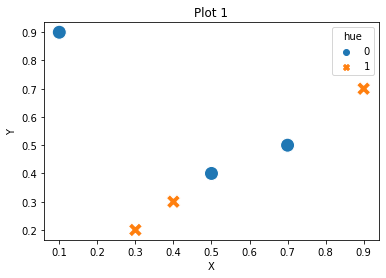

In [18]:
data = pd.DataFrame({'X': [0.1,0.3,0.5,0.7, 0.4, 0.9],
                     'Y':[0.9, 0.2, 0.4,0.5,0.3, 0.7],
                     'hue':[0,1,0,0,1,1]})

plt.title('Plot 1')
sns.scatterplot(data=data, x= "X", y= "Y", hue="hue", style="hue", s=200)
plt.show()

In [3]:
%%render

impurity = 1- ((3/6)**2 + (3/6)**2)

<IPython.core.display.Latex object>

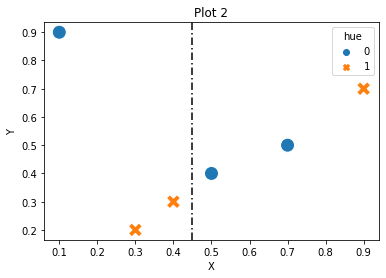

In [4]:

plt.title('Plot 2')
plt.axvline(x= 0.45, dashes = (5, 2, 1, 2), color= 'black')
sns.scatterplot(data=data, x= "X", y= "Y", hue="hue", style="hue", s=200)
plt.show()

In [5]:
%%render

impurity = 3/6 * (1- ((1/3)**2 + (2/3)**2)) + 3/6 * (1- ((2/3)**2 + (1/3)**2))

<IPython.core.display.Latex object>

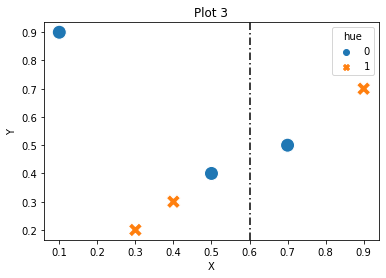

In [6]:
plt.title('Plot 3')
plt.axvline(x= 0.6, dashes = (5, 2, 1, 2), color= 'black')
sns.scatterplot(data=data, x= "X", y= "Y", hue="hue", style="hue", s=200)
plt.show()

In [7]:
%%render

impurity = 4/6 * (1- ((1/4)**2 + (3/4)**2)) + 2/6 * (1- ((2/2)**2 + (0/2)**2))

<IPython.core.display.Latex object>

In [8]:
data = pd.DataFrame({'Chest Pain': [0,1,1,1],
                    'Good Blood Circulation.':[0,1,1,0],
                     'Block Arteries': [0,1,0,1],
                     'Weights':[125,180,210,167],
                     'Heart Disease':[0,1,0,1]
                    })
data

,Chest Pain,Good Blood Circulation.,Block Arteries,Weights,Heart Disease
0,0,0,0,125,0
1,1,1,1,180,1
2,1,1,0,210,0
3,1,0,1,167,1


####  Generate a bootstrap sample with replacement

In [9]:
temp = data.sample(4, replace=True)
temp

,Chest Pain,Good Blood Circulation.,Block Arteries,Weights,Heart Disease
0,0,0,0,125,0
3,1,0,1,167,1
1,1,1,1,180,1
1,1,1,1,180,1


#### Create a decision tree using the bootstrap dataset, but only use a subset of variables at each step

- we randomly select Good Blood Circulation, Blocked Arteries
- Since our example is very small, a small tree is enough, if we split further when we encounter large data, we only randomly select subset of variables at each split

['Chest Pain', 'Weights']


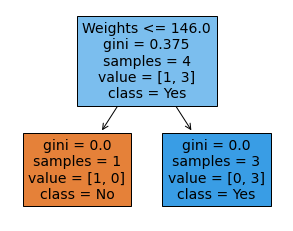

In [10]:
var1= random.sample(list(data)[:-1],2)
print(var1)
X = temp[var1]

y = temp['Heart Disease']

tree1 = DecisionTreeClassifier()
tree1 = tree1.fit(X, y)

fig = plt.figure(figsize=(5,4))
_ = tree.plot_tree(tree1, feature_names = X.columns, class_names = ['No', 'Yes'], filled = True)

####  Now we repeat the previous step 
> 1. Generate another bootstrap Data, 
> 2. Select another set of variables to split

['Block Arteries', 'Chest Pain']


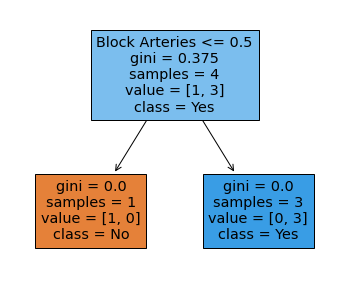

In [11]:
temp = data.sample(4, replace=True)
var2= random.sample(list(data)[:-1],2)
print(var2)
X = temp[var2]
y = temp['Heart Disease']

tree2 = DecisionTreeClassifier()
tree2 = tree2.fit(X, y)

fig = plt.figure(figsize=(6,5))
_ = tree.plot_tree(tree2, feature_names = X.columns, class_names = ['No', 'Yes'], filled = True)

#### Now we repeat the previous step to build a third one
> 1. Generate another bootstrap Data, 
> 2. Select another set of variables to split

['Block Arteries', 'Chest Pain']


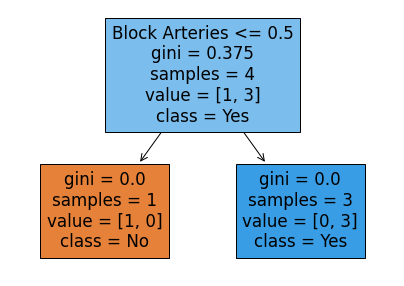

In [12]:
temp = data.sample(4, replace=True)
var3= random.sample(list(data)[:-1],2)
print(var3)
X = temp[var3]
y = temp['Heart Disease']

tree3 = DecisionTreeClassifier()
tree3 = tree2.fit(X, y)

fig = plt.figure(figsize=(7,5))
_ = tree.plot_tree(tree3, feature_names = X.columns, class_names = ['No', 'Yes'], filled = True)

#### Now we make a prediction on a new row

**Using the three tree that we just made**

In [13]:
new = pd.DataFrame({'Chest Pain': [1],
                    'Good Blood Circulation.':[0],
                     'Block Arteries': [0,],
                     'Weights':[168]
                    })
new

,Chest Pain,Good Blood Circulation.,Block Arteries,Weights
0,1,0,0,168


#### Let us use the first tree to predict 

In [14]:
print('The variables that 1st tree need',new[var1], '\n')

pred = tree1.predict(new[var1])

if pred[0] == 1:
    print('1st tree predict Heart Disease')
else:
    print('1st tree predict No Heart Disease')
    

The variables that 1st tree need    Chest Pain  Weights
0           1      168 

1st tree predict Heart Disease


#### Let us use the second tree to predict 

In [15]:
print('The variables that 2nd tree need',new[var1], '\n')

pred = tree2.predict(new[var2])

if pred[0] == 1:
    print('2nd tree predict Heart Disease')
else:
    print('2nd tree predict No Heart Disease')

The variables that 2nd tree need    Chest Pain  Weights
0           1      168 

2nd tree predict No Heart Disease


#### Let us use the third tree to predict 

In [16]:
print('The variables that 3rd tree need',new[var1], '\n')

pred = tree3.predict(new[var3])

if pred[0] == 1:
    print('3rd tree predict Heart Disease')
else:
    print('3rd tree predict No Heart Disease')

The variables that 3rd tree need    Chest Pain  Weights
0           1      168 

3rd tree predict No Heart Disease


#### For the classification task, random forest will take a vote, the label with majority votes will be the prediction

#### For the regression task, random forest will take the average of all the predictions the trees made

In [17]:
if sum(tree3.predict(new[var3])+tree2.predict(new[var2])+ tree1.predict(new[var1])) >=2:
    print('Predict Heart Disease')
else:
    print('Predict No Heart Disease')

Predict No Heart Disease
